In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as stat
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols

In [2]:
#### 데이터 로드####
GDP=pd.read_csv("gdp.csv")
hum=pd.read_csv("humanities.csv")
internet=pd.read_csv("internet.csv")
list1=pd.read_csv("cont-list.csv")

In [3]:
GDP.head()

,Country Name,Country Code,Series Name,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],gdp,(cf.gdp=average(gdp))
0,Burundi,BDI,GDP per capita (constant 2010 US$),235.988767,238.816046,242.845995,245.326739,228.432544,219.9614978,214.1392462,210.8042258,208.0747269,227.154421,NaN
1,Central African Republic,CAF,GDP per capita (constant 2010 US$),505.238459,528.644927,335.389155,334.440499,346.693797,359.6000403,371.1087922,379.3650086,384.1455616,393.847360,NaN
2,"Congo, Dem. Rep.",COD,GDP per capita (constant 2010 US$),345.266115,357.598296,375.219176,397.341671,411.020573,407.2896431,408.9247934,418.9888115,423.6402556,393.921037,NaN
3,Madagascar,MDG,GDP per capita (constant 2010 US$),466.349175,467.435790,465.388777,468.113035,469.942367,475.7454935,481.3831479,490.0973329,500.4019708,476.095232,NaN
4,Sierra Leone,SLE,GDP per capita (constant 2010 US$),417.603168,470.301405,555.205562,567.834267,441.137664,457.8330917,466.9450694,472.8254381,488.4558735,482.015727,NaN


In [4]:
hum.head()

,Country Name,Country Code,Series,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],humanities,(cf.humanities=average(humanities))
0,San Marino,SMR,Percentage of graduates from tertiary educatio...,..,..,..,..,..,..,..,...,..,..,..,..,..,50,..,..,50.00000,NaN
1,Myanmar,MMR,Percentage of graduates from tertiary educatio...,..,..,..,..,..,..,..,...,..,..,..,..,..,45.73972,..,..,45.73972,NaN
2,Chad,TCD,Percentage of graduates from tertiary educatio...,40.55944,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,40.55944,NaN
3,Marshall Islands,MHL,Percentage of graduates from tertiary educatio...,..,..,..,..,..,..,..,...,..,..,..,..,..,..,34.32836,..,34.32836,NaN
4,Bangladesh,BGD,Percentage of graduates from tertiary educatio...,..,..,..,..,..,..,..,...,..,..,..,31.10834,31.10834,..,31.64939,..,31.28869,NaN


In [5]:
internet.head()

,Country Name,Series Name,Version Name,Version Code,2016 [YR2016],2017 [YR2017],2019 [YR2019],2018 [YR2018],internet,(cf.internet=max(internet))
0,Afghanistan,Individuals using the Internet (% of population),2020 Oct,202010,..,11.44768809,..,..,11.447688,NaN
1,Albania,Individuals using the Internet (% of population),2020 Oct,202010,66.3634447,71.8470405,69.64285467,..,71.847041,NaN
2,Algeria,Individuals using the Internet (% of population),2020 Oct,202010,42.94552688,47.69105515,..,49.03846808,49.038468,NaN
3,Andorra,Individuals using the Internet (% of population),2020 Oct,202010,97.93063712,91.56746703,..,..,97.930637,NaN
4,Angola,Individuals using the Internet (% of population),2020 Oct,202010,13,14.33907936,..,..,14.339079,NaN


In [6]:
list1.head()

,Continent_Name,Continent_Code,country,code
0,Asia,AS,"Afghanistan, Islamic Republic of",AFG
1,Europe,EU,"Albania, Republic of",ALB
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),ATA
3,Africa,AF,"Algeria, People's Democratic Republic of",DZA
4,Oceania,OC,American Samoa,ASM


In [7]:
####################
####데이터 merge####
####################
GDP=pd.DataFrame(GDP)
hum=pd.DataFrame(hum)
internet=pd.DataFrame(internet)
list1=pd.DataFrame(list1)

####필요한 column 추출####
GDP1 = GDP.iloc[:,[0,1,12]]
hum1 = hum.iloc[:,[0,1,24]]
internet1 = internet.iloc[:,[0,8]]
list11 = list1.iloc[:,[0,1,3]]

In [8]:
####merging####
internet2 = internet1.set_axis(["country","internet"], axis=1)
list2 = list11.set_axis(["continent","cont.code","code"], axis=1)

In [9]:
total1=pd.merge(GDP1,hum1,on="Country Code")
total11=total1.iloc[:,[0,1,2,4]]
total111=total11.set_axis(["country","code","gdp","humanities"],axis=1)
total111.head()

,country,code,gdp,humanities
0,Burundi,BDI,227.154421,6.001913
1,"Congo, Dem. Rep.",COD,393.921037,4.055420
2,Madagascar,MDG,476.095232,11.118958
3,Sierra Leone,SLE,482.015727,15.699170
4,Ethiopia,ETH,482.905262,2.029958


In [10]:
total2=pd.merge(total111,internet2,on="country")
total=pd.merge(total2,list2,on="code")
total.head()

,country,code,gdp,humanities,internet,continent,cont.code
0,Burundi,BDI,227.154421,6.001913,5.173627,Africa,AF
1,"Congo, Dem. Rep.",COD,393.921037,4.055420,8.619905,Africa,AF
2,Madagascar,MDG,476.095232,11.118958,4.713663,Africa,AF
3,Sierra Leone,SLE,482.015727,15.699170,13.236930,Africa,AF
4,Ethiopia,ETH,482.905262,2.029958,18.618051,Africa,AF


In [11]:
total=total.sort_values(by="code")
total.head()

,country,code,gdp,humanities,internet,continent,cont.code
39,Angola,AGO,3555.790628,1.022670,14.339079,Africa,AF
49,Albania,ALB,4620.357259,11.163354,71.847041,Europe,EU
112,Andorra,AND,42524.493660,2.209833,97.930637,Europe,EU
109,United Arab Emirates,ARE,39002.960090,6.966156,99.149998,Asia,AS
75,Argentina,ARG,10415.064730,10.102193,74.294907,South America,SA


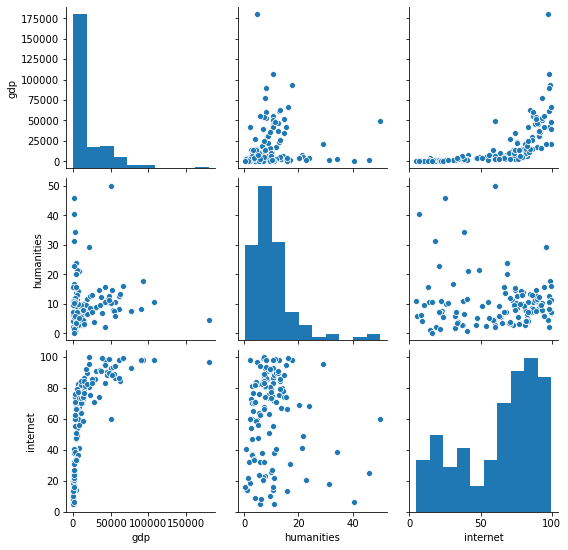

In [12]:
####plot####
sns.pairplot(total)

In [13]:
####변수변환####
lngdp = pd.Series(np.log(total['gdp']))
total = total.assign(lngdp=lngdp.values) # ln gdp
total.head()

,country,code,gdp,humanities,internet,continent,cont.code,lngdp
39,Angola,AGO,3555.790628,1.022670,14.339079,Africa,AF,8.176333
49,Albania,ALB,4620.357259,11.163354,71.847041,Europe,EU,8.438227
112,Andorra,AND,42524.493660,2.209833,97.930637,Europe,EU,10.657836
109,United Arab Emirates,ARE,39002.960090,6.966156,99.149998,Asia,AS,10.571393
75,Argentina,ARG,10415.064730,10.102193,74.294907,South America,SA,9.251009


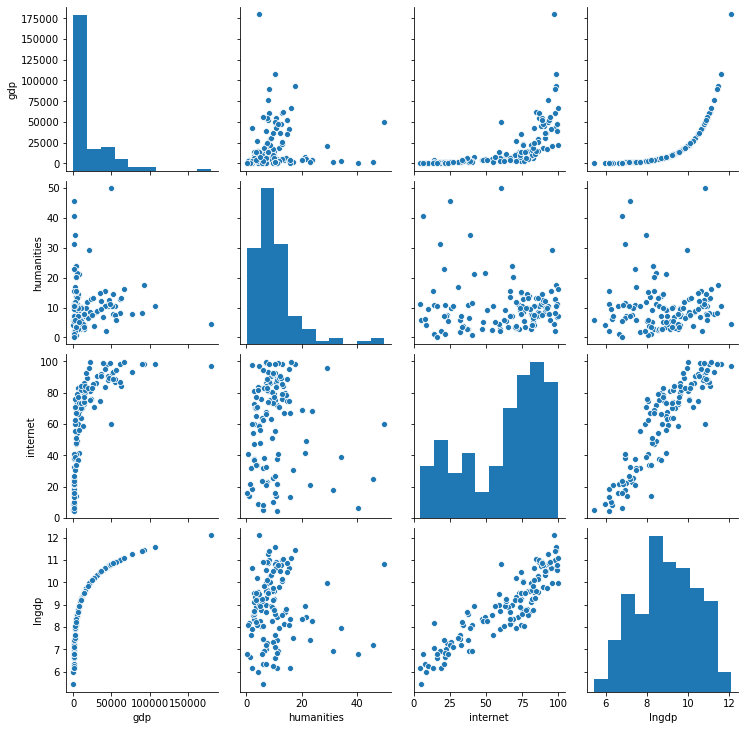

In [14]:
sns.pairplot(total)

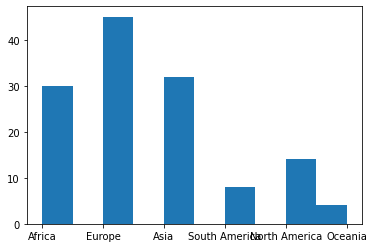

In [15]:
####bar plot####
plt.hist(total["continent"])
plt.show()

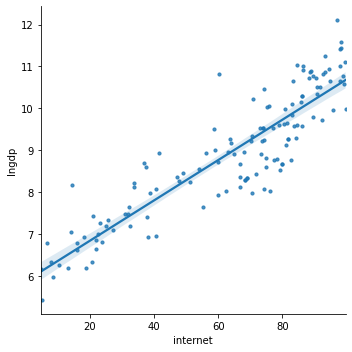

In [16]:
sns.lmplot(x='internet',y='lngdp',data=total, scatter_kws={"s": 10})

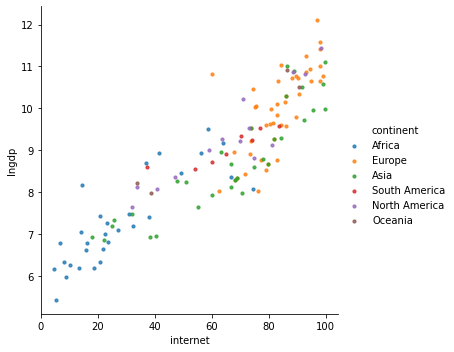

In [17]:
sns.lmplot(x = 'internet', y = 'lngdp', data = total, hue = 'continent', fit_reg=False, scatter_kws={"s": 10})

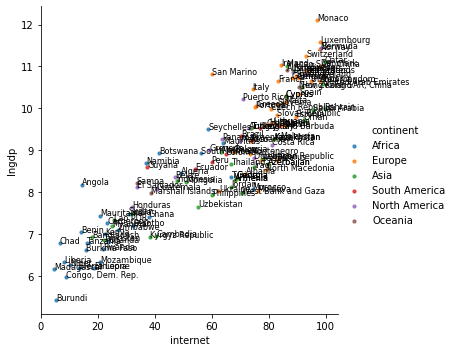

In [18]:
ax=sns.lmplot(x = 'internet', y = 'lngdp', data = total, hue = 'continent', fit_reg=False, scatter_kws={"s": 10})

def label_point(x, y, val, ax):
    a = pd.concat({'internet': x, 'lngdp': y, 'country': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['internet'], point['lngdp'], str(point['country']))
        
plt.rcParams.update({'font.size':8})
label_point(total.internet, total.lngdp, total.country, plt.gca()) 

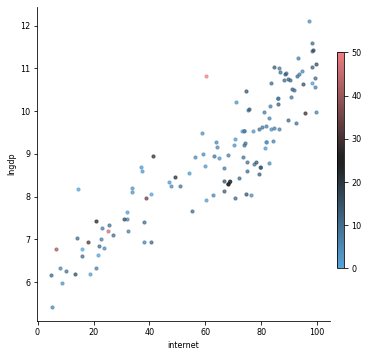

In [19]:
g = sns.lmplot( x='internet', y='lngdp', data=total, hue='humanities',fit_reg=False,legend=False, scatter_kws={"s": 0})

def facet_scatter(x, y, c, **kwargs):
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 50
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'internet', 'lngdp', "humanities",
          s=10, alpha=0.7, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=0.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap,s=0.1)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

<AxesSubplot:xlabel='continent', ylabel='lngdp'>

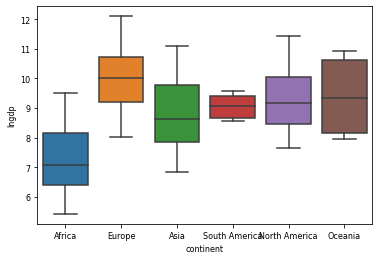

In [20]:
sns.boxplot(y='lngdp', x='continent', data=total)

<AxesSubplot:xlabel='continent', ylabel='internet'>

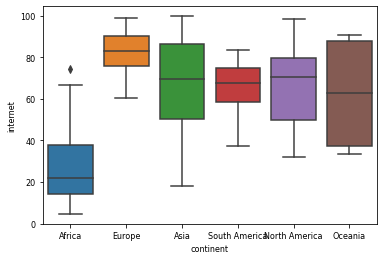

In [21]:
sns.boxplot(y='internet', x='continent',data=total)

<AxesSubplot:xlabel='continent', ylabel='humanities'>

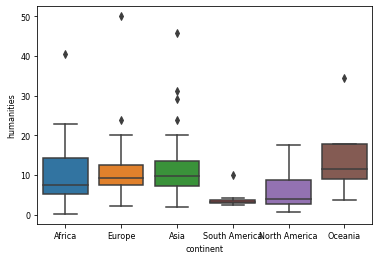

In [22]:
sns.boxplot(y='humanities', x='continent',data=total)

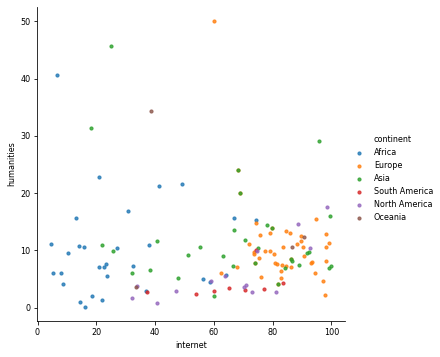

In [23]:
sns.lmplot( x='internet', y='humanities', data=total, fit_reg=False, hue='continent', scatter_kws={"s": 10})
plt.show()

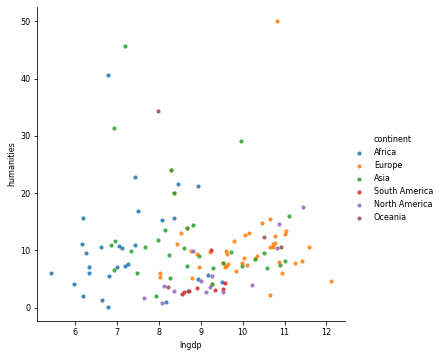

In [24]:
sns.lmplot( x='lngdp', y='humanities', data=total, fit_reg=False, hue='continent', scatter_kws={"s": 10})
plt.show()

In [25]:
###internet을 도구변수로 가정한 후, 각 변수들간의 관게를 plot으로 파악###
total.corr()

,gdp,humanities,internet,lngdp
gdp,1.000000,0.025882,0.601777,0.781704
humanities,0.025882,1.000000,-0.055306,-0.015129
internet,0.601777,-0.055306,1.000000,0.898018
lngdp,0.781704,-0.015129,0.898018,1.000000


In [26]:
fit=ols('internet~lngdp',data=total).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     545.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           1.50e-48
Time:                        20:49:17   Log-Likelihood:                -519.80
No. Observations:                 133   AIC:                             1044.
Df Residuals:                     131   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.1533      6.480    -13.296      0.000     -98.972     -73.335
lngdp         16.7462      0.717     23.362      0.000      15.328      18.164
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.144
Skew:                          -0.081   Prob(JB):                        0.930
Kurtosis:                       3.005   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
fitted=fit.fittedvalues
total = total.assign(fitted=fitted.values)
total.head()

,country,code,gdp,humanities,internet,continent,cont.code,lngdp,fitted
39,Angola,AGO,3555.790628,1.022670,14.339079,Africa,AF,8.176333,50.769013
49,Albania,ALB,4620.357259,11.163354,71.847041,Europe,EU,8.438227,55.154745
112,Andorra,AND,42524.493660,2.209833,97.930637,Europe,EU,10.657836,92.324693
109,United Arab Emirates,ARE,39002.960090,6.966156,99.149998,Asia,AS,10.571393,90.877109
75,Argentina,ARG,10415.064730,10.102193,74.294907,South America,SA,9.251009,68.765723


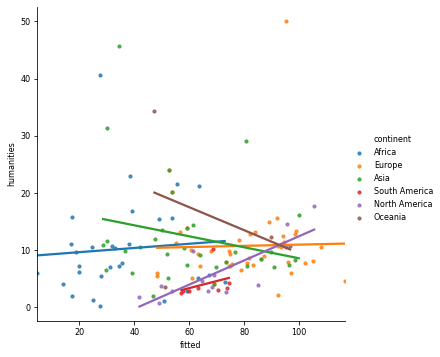

In [28]:
sns.lmplot( x='fitted', y='humanities', data=total, ci=False, hue='continent', scatter_kws={"s": 10})
plt.show()

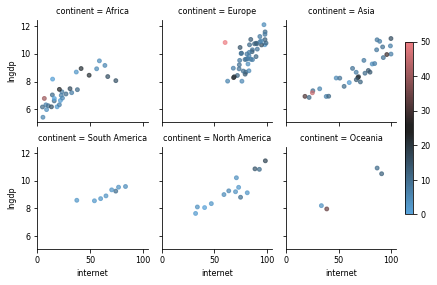

In [29]:
g = sns.FacetGrid(total, col='continent', palette = 'seismic', col_wrap=3, height=2)

def facet_scatter(x, y, c, **kwargs):
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 50
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'internet', 'lngdp', "humanities",
          s=15, alpha=0.7, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)